In [1]:
#module to import other ipynb notebook
#!pip install ipynb 

# BitcoinVision: Using Machine Learning and Data Mining to Predict The Short-Term and Long-Term Price of Bitcoin

In [2]:
# Import Statements
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import ipynb.fs.full.blockchain_api as blockchain_data
warnings.filterwarnings('ignore') 

In [3]:
# blockchain_data.get_block_details(dir='./resource/block_details')
# blockchain_data.get_market_signals(dir='./resource/market_signals')
# blockchain_data.get_mining_information(dir='./resource/mining_information')
# blockchain_data.get_network_activity(dir='./resource/network_actvity')
# blockchain_data.get_wallet_activity(dir='./resource/wallet_activity')

# Phase 1: Data Understanding

## 1.1. Data Loading

### 1.1.1. Bitcoin Price

In [4]:
bitcoin_price = pd.read_csv('./resource/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
bitcoin_price['Timestamp'] = pd.to_datetime(bitcoin_price.Timestamp, unit='s')
bitcoin_price.index = bitcoin_price['Timestamp']
bitcoin_price = bitcoin_price.drop(columns=['Timestamp'])

In [5]:
bitcoin_price.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
bitcoin_price.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
2021-03-31 00:00:00,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


Because the data dates back as early as 2011 which is the year of Bitcoin's inception, there is very little transaction happening in the beginning of the data thus producing a lot of NaN (Null) values whereas the more recent data has transaction happening every minutes.

The NaN values possibly need to be addressed either by resampling the data to 5/10/15/30/60 minute interval, 1 day interval or by imputing the NaNs with 0.


## Plotting Weighted Price

Weighted Price will be our target. Let's plot a line chart of the weighted_price with various resampled timestamp (1 Hour, 1 Day, 1 Week, 1 Month, 1 Quarter (3 months))

bitcoin_price_hour = bitcoin_price.resample('H').mean()
print(f'bitcoin_price_hour shape: {bitcoin_price_hour.shape}')
bitcoin_price_day = bitcoin_price.resample('D').mean()
print(f'bitcoin_price_day shape: {bitcoin_price_day.shape}')
bitcoin_price_week = bitcoin_price.resample('W').mean()
print(f'bitcoin_price_week shape: {bitcoin_price_week.shape}')
bitcoin_price_month = bitcoin_price.resample('M').mean()
print(f'bitcoin_price_month shape: {bitcoin_price_month.shape}')
bitcoin_price_3month = bitcoin_price.resample('3M').mean()
print(f'bitcoin_price_3month shape: {bitcoin_price_3month.shape}')

fig, axes = plt.subplots(5, 1, figsize=(20, 20))

sns.lineplot(ax=axes[0], data=bitcoin_price_hour.Weighted_Price, label='By Hour')

sns.lineplot(ax=axes[1], data=bitcoin_price_day.Weighted_Price, label='By Days')

sns.lineplot(ax=axes[2], data=bitcoin_price_week.Weighted_Price, label='By Week')

sns.lineplot(ax=axes[3], data=bitcoin_price_month.Weighted_Price, label='By Month')

sns.lineplot(ax=axes[4], data=bitcoin_price_3month.Weighted_Price, label='By 3 Months')

plt.show()

### 1.1.2. Block Details (Bitcoin Blockchain Information)

|        Column Name       |                                                    Description                                                    |
|:------------------------:|:-----------------------------------------------------------------------------------------------------------------:|
|        block-size        |                       The total size of the blockchain minus database indexes in megabytes.                       |
|      avg-block-size      |                            The average block size over the past 24 hours in megabytes.                            |
| median-confirmation-time | The median time for a transaction with miner fees to be included in a mined block and added to the public ledger. |
|  n-transaction-per-block |                        The average number of transactions per block over the past 24 hours.                       |
|   n-transactions-total   |                                The total number of transactions on the blockchain.                                |

In [7]:
# Block Details
avg_block_size = pd.read_csv('./resource/block_details/avg-block-size', index_col='Timestamp')
block_size = pd.read_csv('./resource/block_details/blocks-size', index_col='Timestamp')
median_confirmation_time = pd.read_csv('./resource/block_details/median-confirmation-time', index_col='Timestamp')
n_transactions_per_block = pd.read_csv('./resource/block_details/n-transactions-per-block', index_col='Timestamp')
n_transactions_total = pd.read_csv('./resource/block_details/n-transactions-total', index_col='Timestamp')

In [8]:
# avg_block_size
# block_size
# median_confirmation_time
# n_transactions_per_block
# n_transactions_total
block_details_list = [avg_block_size, block_size, median_confirmation_time, n_transactions_per_block, n_transactions_total]

### 1.1.3 Market Signals (Bitcoin Blockchain Information)

|              Column Name             |                                                                                      Description                                                                                      |
|:------------------------------------:|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
|    Market Value to Realised Value    | MVRV is calculated by dividing Market Value by Realised Value. In Realised Value, BTC prices are taken at the time they last moved, instead of the current price like in Market Value |
|     Network Value to Transactions    |                              NVT is computed by dividing the Network Value (= Market Value) by the total transactions volume in USD over the past 24hour.                             |
| Network Value to Transactions Signal |                             NVTS is a more stable measure of NVT, with the denominator being the moving average over the last 90 days of NVT's denominator                            |

In [9]:
market_value_to_realised_value = pd.read_csv('./resource/market_signals/mvrv')
network_value_to_transactions = pd.read_csv('./resource/market_signals/nvt')
network_value_to_transactions_signal = pd.read_csv('./resource/market_signals/nvts')

In [10]:
# market_value_to_realised_value
# network_value_to_transactions
# network_value_to_transactions_signal
market_signals_list = [market_value_to_realised_value, network_value_to_transactions, network_value_to_transactions_signal]

### 1.1.4 Mining Information (Bitcoin Blockchain Information)

|          Column Name         |                                                Description                                                |
|:----------------------------:|:---------------------------------------------------------------------------------------------------------:|
|     cost-per-transaction     |                   A chart showing miners revenue divided by the number of transactions.                   |
| cost-per-transaction-percent |                  A chart showing miners revenue as percentage of the transaction volume.                  |
|          difficulty          |             A relative measure of how difficult it is to mine a new block for the blockchain.             |
|   fees-usd-per-transaction   |                              Average transaction fees in USD per transaction.                             |
|           hash-rate          |   The estimated number of terahashes per second the bitcoin network is performing in the last 24 hours.   |
|        miners-revenue        |                 Total value of coinbase block rewards and transaction fees paid to miners.                |
|       transaction-fees       | The total BTC value of all transaction fees paid to miners. This does not include coinbase block rewards. |
|     transaction-fees-usd     | The total USD value of all transaction fees paid to miners. This does not include coinbase block rewards. |

In [11]:
cost_per_transaction = pd.read_csv('./resource/mining_information/cost-per-transaction', index_col='Timestamp')
cost_per_transaction_percent = pd.read_csv('./resource/mining_information/cost-per-transaction-percent', index_col='Timestamp')
difficulty = pd.read_csv('./resource/mining_information/difficulty', index_col='Timestamp')
fees_usd_per_transaction = pd.read_csv('./resource/mining_information/fees-usd-per-transaction', index_col='Timestamp')
hash_rate = pd.read_csv('./resource/mining_information/hash-rate', index_col='Timestamp')
miners_revenue = pd.read_csv('./resource/mining_information/miners-revenue', index_col='Timestamp')
transaction_fees = pd.read_csv('./resource/mining_information/transaction-fees', index_col='Timestamp')
transaction_fees_usd = pd.read_csv('./resource/mining_information/transaction-fees-usd', index_col='Timestamp')

In [12]:
#cost_per_transaction
#cost_per_transaction_percent
#difficulty
#fees_usd_per_transaction
#hash_rate
#miners_revenue
#transaction_fees
#transaction_fees_usd
mining_information_list = [cost_per_transaction, cost_per_transaction_percent, difficulty, fees_usd_per_transaction, hash_rate, miners_revenue, transaction_fees, transaction_fees_usd]

### 1.1.5. Network Activity (Bitcoin Blockchain Information)

|            Column Name           |                                                     Description                                                     |
|:--------------------------------:|:-------------------------------------------------------------------------------------------------------------------:|
|   estimated-transaction-volume   | The total estimated value in BTC of transactions on the blockchain. This does not include coins returned as change. |
| estimated-transaction-volume-usd | The total estimated value in USD of transactions on the blockchain. This does not include coins returned as change. |
|          n-transactions          |                                 The total number of confirmed transactions per day.                                 |
| n-transactions-excluding-popular |         The total number of transactions excluding those involving the network's 100 most popular addresses.        |
|        n-unique-addresses        |                             The total number of unique addresses used on the blockchain.                            |
|           output-volume          |      The total value of all transaction outputs per day. This includes coins returned to the sender as change.      |


In [13]:
estimated_transaction_volume = pd.read_csv('./resource/network_activity/estimated-transaction-volume', index_col='Timestamp')
estimated_transaction_volume_usd = pd.read_csv('./resource/network_activity/estimated-transaction-volume-usd', index_col='Timestamp')
n_transactions = pd.read_csv('./resource/network_activity/n-transactions', index_col='Timestamp')
n_transactions_exlcuding_popular = pd.read_csv('./resource/network_activity/n-transactions-excluding-popular', index_col='Timestamp')
n_unique_addresses = pd.read_csv('./resource/network_activity/n-unique-addresses', index_col='Timestamp')
output_volume = pd.read_csv('./resource/network_activity/output-volume', index_col='Timestamp')

In [14]:
# estimated_transaction_volume
# estimated_transaction_volume_usd
# n_transactions
# n_transactions_exlcuding_popular
# n_unique_addresses #Only 3417 rows need to check why
# output_volume 
network_activity_list = [estimated_transaction_volume, estimated_transaction_volume_usd, n_transactions, n_transactions_exlcuding_popular, n_unique_addresses, output_volume]

### 1.1.6. Wallet Activity (Bitcoin Blockchain Information)

|    Column Name    |                         Description                        |
|:-----------------:|:----------------------------------------------------------:|
| n-wallets | The total number of unique Blockchain.com wallets created. |


In [15]:
n_wallets = pd.read_csv('./resource/wallet_activity/my-wallet-n-users')

In [16]:
n_wallets

,Timestamp,my-wallet-n-users
0,2011-12-30 00:00:00,406.0
1,2011-12-31 00:00:00,406.0
2,2012-01-01 00:00:00,412.0
3,2012-01-02 00:00:00,420.0
4,2012-01-03 00:00:00,431.0
...,...,...
26933,2021-05-19 21:54:32,73079866.0
26934,2021-05-19 22:54:32,73079866.0
26935,2021-05-19 23:54:32,73079866.0
26936,2021-05-20 00:54:32,73079866.0


# Phase 2: Data Preparation

## 2.1. Data Cleaning 

### 2.1.1. Bitcoin Price 

For bitcoin price, the data is going to be resampled to be one day worth of data. Thus each column need to be aggregated properly. 

- open = aggregate by choosing the first data of the day

- high = aggregate by choosing the max data of the day

- low = aggregate by choosing the min data of the day

- close = aggregate by choosing the last data of the day

- volume_btc = aggregate by sum up all of the data of the day

- volume_currency = aggregate by sum up all of the data of the day

- weighted_price = aggregate by calculating the mean of all the data of the day

In [17]:
weighted_price = bitcoin_price['Weighted_Price'].resample('D').mean()
volume_currency = bitcoin_price['Volume_(Currency)'].resample('D').sum()
volume_btc = bitcoin_price['Volume_(BTC)'].resample('D').sum()
close = bitcoin_price['Close'].resample('D').last()
low = bitcoin_price['Low'].resample('D').min()
high = bitcoin_price['High'].resample('D').max()
open = bitcoin_price['Open'].resample('D').first()

resampled_bitcoin_price = pd.concat([
    open, high, low, close, volume_btc, volume_currency, weighted_price
], axis=1)
resampled_bitcoin_price = resampled_bitcoin_price.loc[:'2021-03-30'] #Delete the data for 2021-03-31 because it only has 1 row (1 minute) of data so it is unreliable
print('Check for Null Values\n',resampled_bitcoin_price[resampled_bitcoin_price.isnull().any(axis=1)])
resampled_bitcoin_price.loc['2015-01-06':'2015-01-08'] = np.nan # Set everything to NaN for interpolate
resampled_bitcoin_price = resampled_bitcoin_price.interpolate()
print('\nCheck for Null Values after imputing\n',resampled_bitcoin_price[resampled_bitcoin_price.isnull().any(axis=1)])

Check for Null Values
             Open  High  Low  Close  Volume_(BTC)  Volume_(Currency)  \
Timestamp                                                             
2015-01-06   NaN   NaN  NaN    NaN           0.0                0.0   
2015-01-07   NaN   NaN  NaN    NaN           0.0                0.0   
2015-01-08   NaN   NaN  NaN    NaN           0.0                0.0   

            Weighted_Price  
Timestamp                   
2015-01-06             NaN  
2015-01-07             NaN  
2015-01-08             NaN  

Check for Null Values after imputing
 Empty DataFrame
Columns: [Open, High, Low, Close, Volume_(BTC), Volume_(Currency), Weighted_Price]
Index: []


### 2.1.2. Block Details

In [18]:
block_details = pd.concat(block_details_list, axis=1)
block_details.index = pd.to_datetime(block_details.index)
block_details = block_details.loc[:'2021-03-30'] #Remove all data after 2021-03-30 to follow resampled_bitcoin_price data timestamp
block_details

,avg-block-size,blocks-size,median-confirmation-time,n-transactions-per-block,n-transactions-total
Timestamp,,,,,
2011-12-31,0.016243,859.493705,12.133333,34.019868,2114742.0
2012-01-01,0.017073,861.941752,15.050000,32.686275,2119853.0
2012-01-02,0.019121,864.547504,15.566667,35.827815,2124845.0
2012-01-03,0.018212,867.445999,13.616667,36.308176,2130220.0
2012-01-04,0.019351,870.374487,13.616667,38.463087,2135991.0
...,...,...,...,...,...
2021-03-26,1.318636,335474.719544,10.008333,2158.897059,628178277.0
2021-03-27,1.298147,335654.039524,9.116667,1812.949686,628471132.0
2021-03-28,1.315239,335860.427386,7.450000,1563.553459,628759073.0


### 2.1.3. Market Signals

For market signals, since the data is in minutes format, the data is resampled to one day while applying mean aggregate function

In [19]:
market_signals = pd.DataFrame()
for df in market_signals_list:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df.index = df['Timestamp']
    df = df.drop(columns=['Timestamp'])
    df = df.resample('D').mean()
    market_signals = pd.concat([market_signals, df], axis=1)
market_signals = market_signals.loc[:'2021-03-30'] #Remove all data after 2021-03-30 to follow resampled_bitcoin_price data timestamp
market_signals

,mvrv,nvt,nvts
Timestamp,,,
2011-12-31,0.857510,27.510527,9.454969
2012-01-01,0.966318,33.344663,10.706339
2012-01-02,1.011669,24.322611,11.225241
2012-01-03,1.045427,32.605144,11.653318
2012-01-04,1.027685,24.021108,11.521200
...,...,...,...
2021-03-26,3.138287,11.518272,12.132993
2021-03-27,3.237818,14.128358,12.547307
2021-03-28,3.270278,17.140425,12.699556


### 2.1.4. Mining Information

In [20]:
mining_information = pd.concat(mining_information_list, axis=1)
mining_information.index.name = 'Timestamp'
mining_information.index = pd.to_datetime(mining_information.index)
mining_information = mining_information.loc[:'2021-03-30']
mining_information

,cost-per-transaction,cost-per-transaction-percent,difficulty,fees-usd-per-transaction,hash-rate,miners-revenue,transaction-fees,transaction-fees-usd
Timestamp,,,,,,,,
2011-12-31,6.583145,9.138363,1.159929e+06,0.003452,9.283326e+00,3.510791e+04,3.945408,1.841019e+01
2012-01-01,7.910605,4.193102,1.159929e+06,0.003438,8.591401e+00,4.260652e+04,3.554281,1.851638e+01
2012-01-02,8.429764,8.391786,1.159929e+06,0.004815,8.764382e+00,6.301249e+04,5.553122,3.598932e+01
2012-01-03,7.434321,7.722457,1.159929e+06,0.004872,9.340986e+00,4.662806e+04,5.352158,3.056013e+01
2012-01-04,7.544980,6.279210,1.159929e+06,0.012517,8.879703e+00,4.706558e+04,14.195877,7.808277e+01
...,...,...,...,...,...,...,...,...
2021-03-26,168.775045,0.661193,2.186556e+13,14.736613,1.478242e+08,4.955404e+07,81.241492,4.326817e+06
2021-03-27,203.627228,1.583865,2.186556e+13,12.716284,1.728239e+08,5.921297e+07,66.631315,3.697781e+06
2021-03-28,236.407218,2.139981,2.186556e+13,13.037265,1.728239e+08,5.877202e+07,58.001620,3.241129e+06


### 2.1.5. Network Activity

For network activity, in the data loading and data exploration phase it was found out that n-unique-addresses, estimated-transaction-volume and estimated-transaction-volume-usd has less low than the rest of the data. Thus, in this phase, here are the action taken to address the missing data after concatenating.

- estimated-transaction-volume = ignore the missing data, it is going to be dropped when the data after 2021-03-30 is deleted
- estimated-transaction-volume-usd = ignore the missing data, it is going to be dropped when the data after 2021-03-30 is deleted
- n-unique-adresses = fill the missing data by calculating the average of the previous and next row value

In [21]:
network_activity = pd.concat(network_activity_list, axis=1)
print(f'Check for missing values with original data\n{network_activity.isnull().sum()}')
network_activity.index.name = 'Timestamp'
network_activity.index = pd.to_datetime(network_activity.index)
network_activity = network_activity.loc[:'2021-03-30']
print(f'\nMissing value after deleting data after 2021-03-30\n{network_activity.isnull().sum()}') #9 rows of n-unique-addresses are missing

Check for missing values with original data
estimated-transaction-volume        1
estimated-transaction-volume-usd    1
n-transactions                      0
n-transactions-excluding-popular    0
n-unique-addresses                  9
output-volume                       0
dtype: int64

Missing value after deleting data after 2021-03-30
estimated-transaction-volume        0
estimated-transaction-volume-usd    0
n-transactions                      0
n-transactions-excluding-popular    0
n-unique-addresses                  9
output-volume                       0
dtype: int64


In [22]:
# Show Missing Data
missing_data = network_activity[network_activity.isnull().any(axis=1)]
missing_data

,estimated-transaction-volume,estimated-transaction-volume-usd,n-transactions,n-transactions-excluding-popular,n-unique-addresses,output-volume
Timestamp,,,,,,
2012-04-07,114536.579400,5.681014e+05,6080.0,6080.0,NaN,3.474648e+05
2012-09-22,235680.224050,2.955430e+06,22014.0,22014.0,NaN,1.487405e+07
2012-12-15,172192.558061,2.388311e+06,32365.0,32365.0,NaN,1.657366e+06
2012-12-29,212853.979838,2.905457e+06,38110.0,38110.0,NaN,9.940917e+05
2013-05-04,193792.078034,1.875907e+07,50493.0,50493.0,NaN,5.169765e+05
2014-10-18,109730.332942,4.204208e+07,66477.0,66477.0,NaN,6.015623e+05
2019-12-20,166611.625143,1.192219e+09,332657.0,324436.0,NaN,1.006115e+06
2020-03-13,548284.152816,2.755020e+09,276798.0,268867.0,NaN,2.348969e+06
2020-05-22,143644.375652,1.309276e+09,278784.0,273638.0,NaN,9.870880e+05


In [23]:
# Fill in missing data using interpolate function
network_activity['n-unique-addresses'] = network_activity['n-unique-addresses'].interpolate().round()
network_activity.loc[missing_data.index]

,estimated-transaction-volume,estimated-transaction-volume-usd,n-transactions,n-transactions-excluding-popular,n-unique-addresses,output-volume
Timestamp,,,,,,
2012-04-07,114536.579400,5.681014e+05,6080.0,6080.0,11328.0,3.474648e+05
2012-09-22,235680.224050,2.955430e+06,22014.0,22014.0,26685.0,1.487405e+07
2012-12-15,172192.558061,2.388311e+06,32365.0,32365.0,30448.0,1.657366e+06
2012-12-29,212853.979838,2.905457e+06,38110.0,38110.0,35136.0,9.940917e+05
2013-05-04,193792.078034,1.875907e+07,50493.0,50493.0,61344.0,5.169765e+05
2014-10-18,109730.332942,4.204208e+07,66477.0,66477.0,182866.0,6.015623e+05
2019-12-20,166611.625143,1.192219e+09,332657.0,324436.0,509576.0,1.006115e+06
2020-03-13,548284.152816,2.755020e+09,276798.0,268867.0,585269.0,2.348969e+06
2020-05-22,143644.375652,1.309276e+09,278784.0,273638.0,591293.0,9.870880e+05


In [24]:
print(f'Check for anymore missing values\n{network_activity.isnull().sum()}')
network_activity

Check for anymore missing values
estimated-transaction-volume        0
estimated-transaction-volume-usd    0
n-transactions                      0
n-transactions-excluding-popular    0
n-unique-addresses                  0
output-volume                       0
dtype: int64


,estimated-transaction-volume,estimated-transaction-volume-usd,n-transactions,n-transactions-excluding-popular,n-unique-addresses,output-volume
Timestamp,,,,,,
2011-12-31,85946.666598,3.841816e+05,5137.0,5137.0,8198.0,2.705356e+05
2012-01-01,201609.048310,1.016110e+06,5001.0,5001.0,8531.0,3.475037e+05
2012-01-02,142482.534073,7.508830e+05,5410.0,5410.0,8928.0,2.626304e+05
2012-01-03,110788.668431,6.037982e+05,5773.0,5773.0,9528.0,2.707430e+05
2012-01-04,139580.305439,7.495462e+05,5731.0,5731.0,9542.0,4.005940e+05
...,...,...,...,...,...,...
2021-03-26,140851.734595,7.494637e+09,293610.0,289918.0,790548.0,1.455943e+06
2021-03-27,67802.903361,3.738512e+09,288259.0,284638.0,722993.0,1.234256e+06
2021-03-28,49183.455835,2.746380e+09,248605.0,244003.0,629197.0,9.218715e+05


### 2.1.6. Wallet Activity

For wallet activity, instead of having the total number of wallets, process the column to represent the number of new wallets created per day.

In [25]:
n_wallets['Timestamp'] = pd.to_datetime(n_wallets.Timestamp)
n_wallets.index = n_wallets.Timestamp
new_n_wallets_data = n_wallets.drop(columns=['Timestamp'])

# Create a new column dataframe to process new-n-wallets-created per day
new_n_wallets_created = new_n_wallets_data.copy()
new_n_wallets_created = new_n_wallets_created.diff()
new_n_wallets_created = new_n_wallets_created.resample('D').sum()
new_n_wallets_created.rename(columns={'my-wallet-n-users':'new-n-wallets-created'}, inplace=True)
print('Number of Null Values:', new_n_wallets_created.isnull().sum())

# Clean the original column
resampled_n_wallets = new_n_wallets_data.resample('D').last()
resampled_n_wallets = resampled_n_wallets.interpolate().round()
print("Number of Null Values:", resampled_n_wallets.isnull().sum())

# Concatenate the two columns
wallets_activity = pd.concat([new_n_wallets_created, resampled_n_wallets], axis=1)
wallets_activity = wallets_activity.loc['2011-12-31':'2021-03-30']
wallets_activity

Number of Null Values: new-n-wallets-created    0
dtype: int64
Number of Null Values: my-wallet-n-users    0
dtype: int64


,new-n-wallets-created,my-wallet-n-users
Timestamp,,
2011-12-31,0.0,406.0
2012-01-01,6.0,412.0
2012-01-02,8.0,420.0
2012-01-03,11.0,431.0
2012-01-04,20.0,451.0
...,...,...
2021-03-26,44127.0,70342663.0
2021-03-27,55469.0,70398132.0
2021-03-28,43385.0,70441517.0


## 2.2. Data Integration

In [48]:
df = pd.concat([
    resampled_bitcoin_price, block_details, market_signals, mining_information, network_activity, wallets_activity
], axis=1)

## 2.3. Feature Selection

Based on using Random Forest Regression to choose relevant features the top relevant features in descending order are:

- High
- Open
- Low
- block-size
- n-transaction-total
- my-wallet-n-users
- Close
- cost-per-transaction

In [49]:
########################################################################################################################

# from sklearn.ensemble import RandomForestRegressor

# X = df.drop(columns=['Weighted_Price'])
# y = df.Weighted_Price

# model = RandomForestRegressor(n_estimators=1000, random_state=1)
# model.fit(X, y)
# model_importance = pd.DataFrame(model.feature_importances_).transpose()
# model_importance.columns = X.columns
# values = model_importance.values.flatten()

# plt.figure(figsize=(20,20))
# sns.barplot(x=values, y=model_importance.columns, orient='h')

#########################################################################################################################

# # Feature Selection using RFE
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestRegressor

# rfe = RFE(RandomForestRegressor(n_estimators=1000, random_state=1), n_features_to_select=10)
# fit = rfe.fit(X, y)
# print('Selected Features:')
# names = X.columns
# for i in range(len(fit.support_)):
#     if fit.support_[i]:
#         print(names[i])

##########################################################################################################################

# Function from https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset. (Create Lagged Input)
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [f'{name}(t-{i})' for name in data.columns]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [f'{name}(t)' for name in data.columns]
        else:
            names += [f'{name}(t+{i})' for name in data.columns]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# def test_stationarity(timeseries):
    
#     #Determing rolling statistics
#     rolmean = timeseries.rolling(12).mean()
#     rolstd = timeseries.rolling(12).std()

#     #Plot rolling statistics:
#     orig = plt.plot(timeseries, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
#     #Perform Dickey-Fuller test:
#     print('Results of Dickey-Fuller Test:')
#     dftest = adfuller(timeseries)
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print(dfoutput)

selected_features = ['Close', 'blocks-size', 'n-transactions-total','cost-per-transaction', 'difficulty', 
                     'miners-revenue', 'my-wallet-n-users', 'Volume_(BTC)', 'Weighted_Price']
feature_extracted_df = df.reindex(columns=selected_features) # Only select the selected features for the new data

Most of the columns are now stationary based on the Dickey-Fuller stationary test. Those that are not stationary is only slightly above the 10% critical value meaning it probably has around 80-89% confidence being stationary.

# TODO: TRY AUTOCORRELATION AFTER BENCHMARK MODELLING IS COMPLETED

## 2.4. Data Splitting 

In [50]:
def train_test_split(data, n_test):
    return data.iloc[:-n_test, :], data.iloc[-n_test:, :] 

## 2.5. Data Transformation

3 datasets will be created and each will be tested:

- transformed_extracted_df
- extracted_df
- reduced_timeline_extracted_df

# TODO: TRY OTHER TRANSFORMATION TECHNIQUE. BOX-COX AND LOG TRANSFORM

In [53]:
# Normalization using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from scipy import stats

def normalize_data(train, valid):
    """
        Arguments: 
            train: DataFrame or Series
            valid: DataFrame or Series
        Returns:
            (DataFrame, DataFrame)
    """
    transformer = MinMaxScaler()
    
    if isinstance(train, pd.Series):
        train = pd.DataFrame(train).transpose()
    if isinstance(valid, pd.Series):
        valid = pd.DataFrame(valid).transpose()
    
    train = pd.DataFrame(transformer.fit_transform(train), columns=train.columns, index=train.index)
    valid = pd.DataFrame(transformer.transform(valid), columns=valid.columns, index=valid.index)
    return train, valid

feature_extracted_df = feature_extracted_df['2016':] # Remove values before 2016
#transformed_extracted_df = feature_extracted_df.diff().dropna() # Create a regular differentiate to stationarize time-series data
# Non-Transformed data = lagged_feature_extracted_df

In [52]:
# # Test Stationarity of each columns
# print('Close')
# test_stationarity(transformed_extracted_df['Close'])
# print('\nblocks-size')
# test_stationarity(transformed_extracted_df['blocks-size'])
# print('\nn-transactions-total')
# test_stationarity(transformed_extracted_df['n-transactions-total'])
# print('\ncost-per-transaction')
# test_stationarity(transformed_extracted_df['cost-per-transaction'])
# print('\ndifficulty')
# test_stationarity(transformed_extracted_df['difficulty'])
# print('\nminers-revenue')
# test_stationarity(transformed_extracted_df['miners-revenue'])
# print('\nmy-wallet-n-users')
# test_stationarity(transformed_extracted_df['my-wallet-n-users'])
# print('\nVolume_(BTC)')
# test_stationarity(transformed_extracted_df['Volume_(BTC)'])
# print('\nWeighted_Price')
# test_stationarity(transformed_extracted_df['Weighted_Price'])

In [31]:
transformed_extracted_df.describe()

,Close,blocks-size,n-transactions-total,cost-per-transaction,difficulty,miners-revenue,my-wallet-n-users,Volume_(BTC),Weighted_Price
count,1915.000000,1915.000000,1915.000000,1915.000000,1.915000e+03,1.915000e+03,1915.000000,1915.000000,1915.000000
mean,30.457843,147.080152,275799.118016,0.089550,1.136380e+10,2.998644e+04,34009.948303,-0.206670,30.242376
std,560.293734,30.340955,58311.668616,7.247554,1.400604e+11,1.905749e+06,27461.986292,6023.289482,490.194294
min,-5285.720000,65.916045,122633.000000,-53.839108,-2.409365e+12,-1.075236e+07,4560.000000,-39048.773186,-5739.474079
25%,-57.785000,123.496277,229290.000000,-1.807892,0.000000e+00,-6.240667e+05,18753.000000,-2547.200469,-44.579892
50%,3.070000,145.711002,280102.000000,0.107711,0.000000e+00,-1.650017e+04,25953.000000,-180.661253,2.755950
75%,95.765000,167.515307,320845.500000,2.363260,0.000000e+00,6.236995e+05,38729.000000,2322.151212,84.999537
max,7558.060000,255.791276,491482.000000,36.271139,1.802293e+12,1.125829e+07,295708.000000,51223.777736,5487.876405


# Phase 3: Data Modelling

## 3.1. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def random_forest_forecast(train, X_valid):
    """
        Arguments:
            train: DataFrame
            X_valid: Series
        returns:
            integer
    """
    X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
    X_train, X_valid = normalize_data(X_train, X_valid)
    model = TransformedTargetRegressor(regressor=RandomForestRegressor(n_estimators=500, random_state=1), transformer=MinMaxScaler())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    return y_pred[0]

def walk_forward_validation(data, n_test):
    """
        Arguments:
            data: DataFrame
            n_test: integer
        Returns:
            (float, Series, list)
    """
    predictions = list()
    train, valid = train_test_split(data, n_test)
    history = train
    for i in range(len(valid)):
        X_valid, y_valid = valid.iloc[i, :-1], valid.iloc[i, -1]
        y_pred = random_forest_forecast(history, X_valid)
        predictions.append(y_pred)
        history = history.append(valid.iloc[i])
        #print('>expected=%.1f, predicted=%.1f' % (y_valid, y_pred))
    error = mean_absolute_error(valid.iloc[:, -1], predictions)
    return error, valid.iloc[:, -1], predictions

n_lag = 5
for i in range(1, n_lag+1):
    lagged_feature_extracted_df = series_to_supervised(transformed_extracted_df, n_in=i)
    mae, y_valid, y_pred = walk_forward_validation(lagged_feature_extracted_df, 50)
    print('MAE: %.3f' % mae)

In [42]:
print('MAE: %.3f' % mae) #This is the MAE of the differences in Weighted Price 
# So to interpret this, on average the error of the model is 202.299 dollar from the mean of the differences of weighted price. 
# So when predicting the next day's price compared to the previous it has an error of 202.299 dollar which is bad because 
# even if bitcoin's very volatile it does not even go up more than 200 dollars on daily basis.

MAE: 202.299


MAE: 1528.309 - lag 1 - n_test 50

MAE: 1538.146 - lag 2 - n_test 50

MAE: 1621.516 - lag 3 - n_test 50

MAE: 1669.117 - lag 4 - n_test 50

MAE: 1700.214 - lag 5 - n_test 50


## 3.2. VARIMA

Steps:

1. Apply regular differentiation (I in ARIMA)
2. Look into Exogenous or VARIMAX or should i just use VARMA
3. Test until I can get a multivariate ARIMA

In [33]:
from statsmodels.tsa.stattools import adfuller



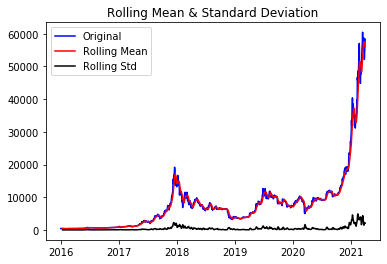

Results of Dickey-Fuller Test:
Test Statistic                    4.380128
p-value                           1.000000
#Lags Used                       26.000000
Number of Observations Used    1889.000000
Critical Value (1%)              -3.433816
Critical Value (5%)              -2.863071
Critical Value (10%)             -2.567585
dtype: float64


In [34]:
test_stationarity(feature_extracted_df.Weighted_Price['2016':'2021'])

In [35]:
test_df = feature_extracted_df.copy()
test_df['Diff_Weighted_Price'] = test_df['Weighted_Price'] - test_df['Weighted_Price'].shift(1)
test_df.dropna(inplace=True)
adfuller(test_df['Diff_Weighted_Price'])

(-7.268869237278007,
 1.6079524582793463e-10,
 25,
 1889,
 {'1%': -3.4338164946764294,
  '5%': -2.863071261312085,
  '10%': -2.5675851863579537},
 28504.515065617754)

In [36]:
# from statsmodels.tsa.statespace.varmax import VARMAX
# train, valid = train_test_split(feature_extracted_df, 50)
# data = [list(train.iloc[x]) for x in range(len(train)-5, len(train))]
# model = VARMAX(data, order=(1, 1))
# model_fit = model.fit(disp=False)
# yhat = model_fit.forecast()
# print(yhat)

In [37]:
from scipy import stats
from statsmodels.tsa.stattools import adfuller

test_data = feature_extracted_df
a,_ = stats.boxcox(test_data.Weighted_Price)
scaler = MinMaxScaler()
b = pd.DataFrame(scaler.fit_transform(test_data), columns=test_data.columns, index=test_data.index)
print(adfuller(a))
print(adfuller(test_data.Weighted_Price))
print(adfuller(b.Weighted_Price))

(0.5413531179122302, 0.9860772476621552, 2, 1913, {'1%': -3.433772946369569, '5%': -2.8630520356606137, '10%': -2.567574949489954}, -1880.2357130103364)
(4.380128251883001, 1.0, 26, 1889, {'1%': -3.4338164946764294, '5%': -2.863071261312085, '10%': -2.5675851863579537}, 28501.21671741157)
(4.380128251882932, 1.0, 26, 1889, {'1%': -3.4338164946764294, '5%': -2.863071261312085, '10%': -2.5675851863579537}, -13070.053533512732)


In [38]:
# VARMA example
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
# fit model
# model = VARMAX(data, order=(1, 1))
# model_fit = model.fit(disp=False)
# # make prediction
# yhat = model_fit.forecast()
# print(yhat)


In [39]:
a_list = [1,2,7,16,5]
a_df = pd.DataFrame(a_list)
b_df = a_df.diff()
b_df.fillna(0, inplace=True)
b_df.iloc[0] = a_df.iloc[0]
b_df.cumsum()

,0
0,1.0
1,2.0
2,7.0
3,16.0
4,5.0


In [40]:
from itertools import product
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
print(list(Qs))
print(list(qs))
print(list(Ps))
print(list(ps))
len(list(parameters))

[0, 1]
[0, 1, 2]
[0, 1, 2]
[0, 1, 2]


54

In [41]:
best_aic = float("inf")
best_aic

inf